In [1]:
#Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Display plots inline
%matplotlib inline

In [2]:
#Load the Mall-Customers dataset
df = pd.read_csv(r"C:\Users\sweet\Desktop\DataScience\Github projects\Deployment files\customer-segmentation-streamlit\data\Mall_Customers.csv")

In [3]:
#Display first 5 rows of the dataset
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#Provides overview of the dataset including column names, data types, and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
#Counts the missing values in each column
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
#Display basic summary statistics
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


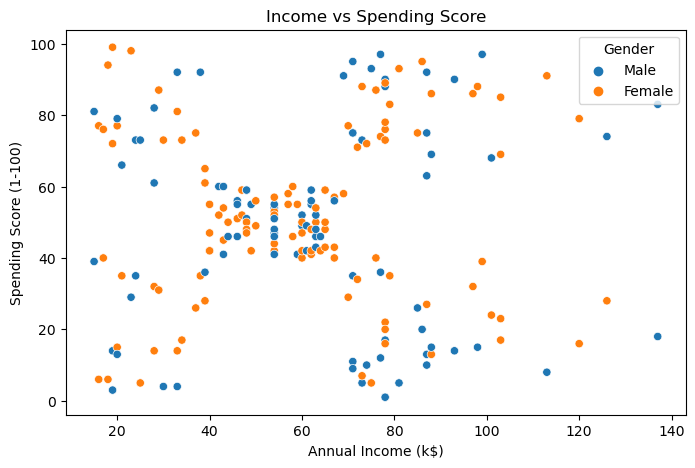

In [7]:
#Creating a Scatterplot to visualize Annual Income vs Spending Score of the customers
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Gender'])
plt.title("Income vs Spending Score")
plt.show()

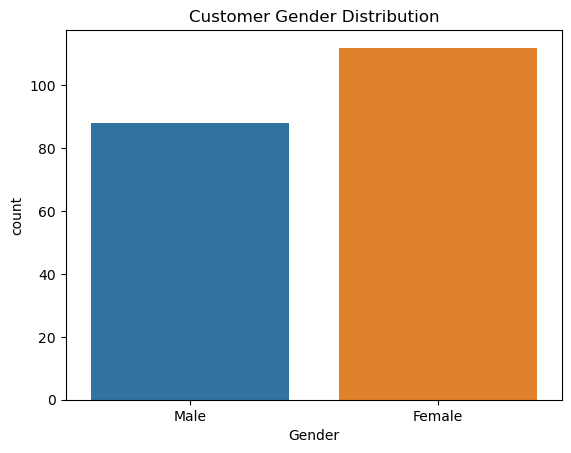

In [8]:
#Bar plots showing Gender distribution of the Customers
sns.countplot(x=df['Gender'])
plt.title("Customer Gender Distribution")
plt.show()

In [9]:
# Define bins and labels
bins = [0, 30, 50, 100]
labels = ['≤30', '31–50', '≥51']

# Create a new column with age groups
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# Display a sample
df[['Age', 'Age_Group']].head()

,Age,Age_Group
0,19,≤30
1,21,≤30
2,20,≤30
3,23,≤30
4,31,31–50


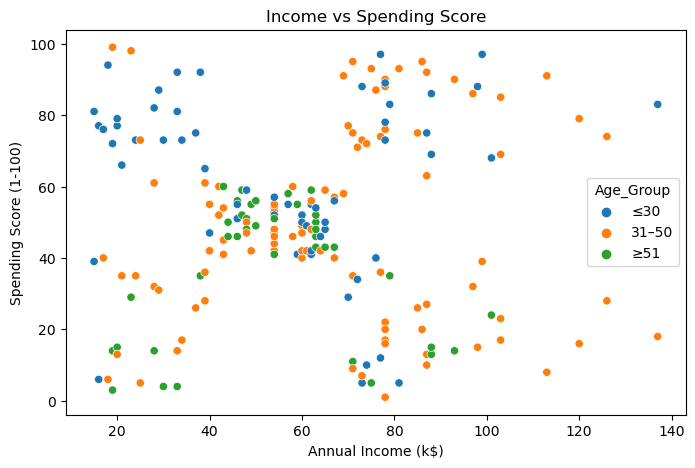

In [10]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Age_Group'])
plt.title("Income vs Spending Score")
plt.show()

C:\Users\sweet\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


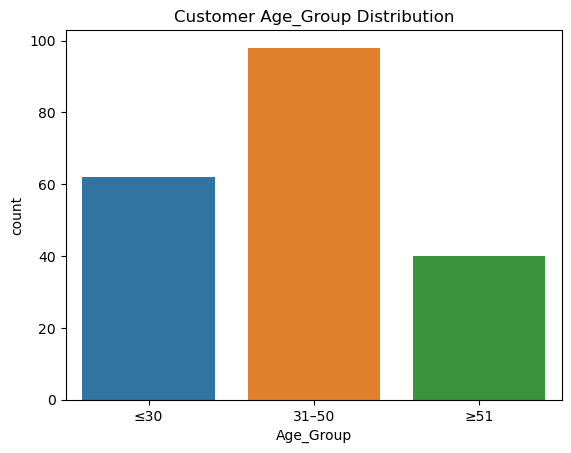

In [11]:
sns.countplot(x=df['Age_Group'])
plt.title("Customer Age_Group Distribution")
plt.show()

# Apply Unsupervised Machine Learning Algorithm - K-Means Clustering

In [12]:
from sklearn.preprocessing import LabelEncoder
# Encode Age_Group to numeric
le = LabelEncoder()
# Manually map age groups to logical numeric values
age_group_map = {'≤30': 0, '31–50': 1, '≥51': 2}
df['Age_Group_encoded'] = df['Age_Group'].map(age_group_map)
# Now use numeric features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age_Group_encoded']]
#Extracting three important features for clustering


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\sweet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sweet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sweet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sweet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

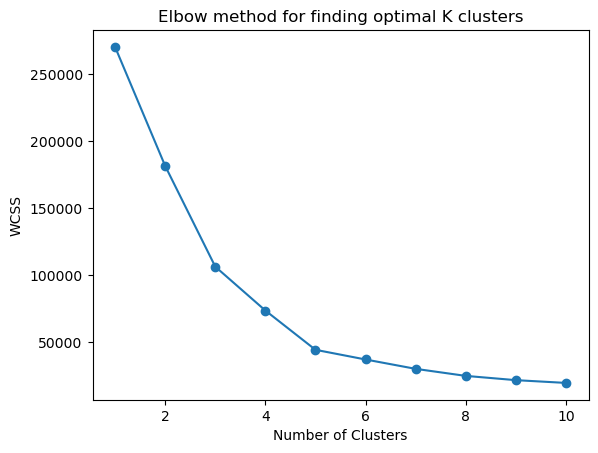

In [14]:
#Determine optimal number of Clusters utilizing elbow method
wcss = []
for i in range(1,11):
    kmeans= KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss,marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow method for finding optimal K clusters')
plt.show()

In [15]:
#Train the K-Means model
kmeans= KMeans(n_clusters=5,init='k-means++',random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

C:\Users\sweet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sweet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [16]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_Group,Age_Group_encoded,Cluster
0,1,Male,19,15,39,≤30,0,2
1,2,Male,21,15,81,≤30,0,3
2,3,Female,20,16,6,≤30,0,2
3,4,Female,23,16,77,≤30,0,3
4,5,Female,31,17,40,31–50,1,2
5,6,Female,22,17,76,≤30,0,3
6,7,Female,35,18,6,31–50,1,2
7,8,Female,23,18,94,≤30,0,3
8,9,Male,64,19,3,≥51,2,2
9,10,Female,30,19,72,≤30,0,3


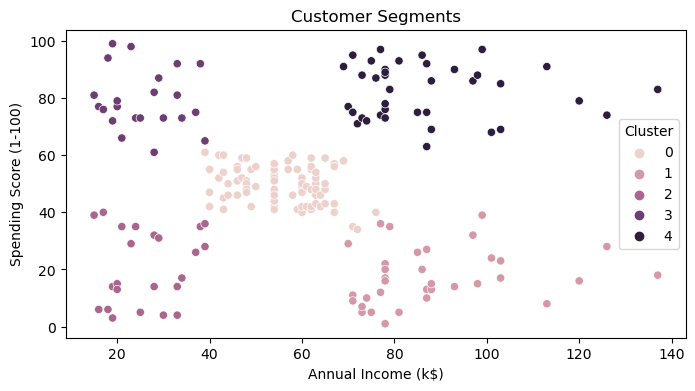

In [17]:
#Visualize the Clusters
plt.figure(figsize=(8,4))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'],hue=df['Cluster'])
plt.title("Customer Segments")
plt.show()



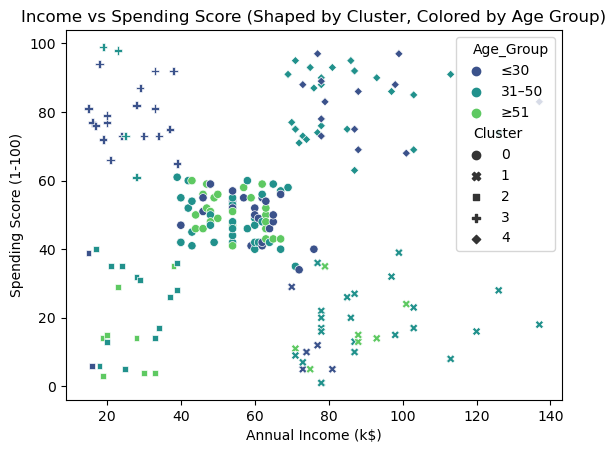

In [18]:
sns.scatterplot(
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)'],
    hue=df['Age_Group'],
    style=df['Cluster'],
    palette='viridis'
)
plt.title("Income vs Spending Score (Shaped by Cluster, Colored by Age Group)")
plt.show()

C:\Users\sweet\AppData\Local\Temp\ipykernel_16940\477056767.py:32: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


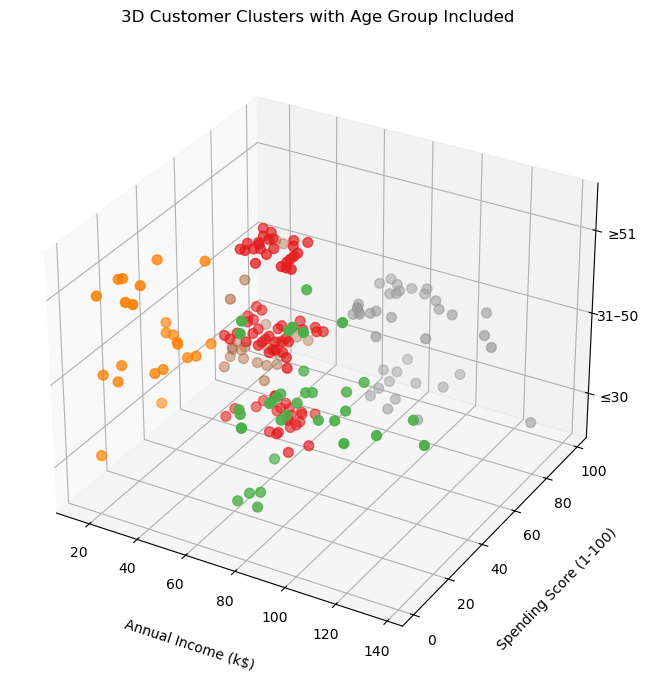

In [19]:
##3D Plot (More Complete View)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(
    df['Annual Income (k$)'],
    df['Spending Score (1-100)'],
    df['Age_Group_encoded'],
    c=df['Cluster'],
    cmap='Set1',
    s=50
)

# Proper axis labels
ax.set_xlabel('Annual Income (k$)', labelpad=18)
ax.set_ylabel('Spending Score (1-100)', labelpad=18)

# Custom ticks and labels on z-axis
ax.set_zticks([0, 1, 2])
ax.set_zticklabels(['≤30', '31–50', '≥51'])
ax.set_zlabel('Age Group', labelpad=18)  # Ensure label shows properly

# Set the z-axis limits just a bit wider to make room for the label
ax.set_zlim(-0.5, 2.5)

# Title
ax.set_title('3D Customer Clusters with Age Group Included', pad=20)

plt.tight_layout()
plt.show()


# RESULTS


## Key Observations of the Clusters

The scatter plot visualizes customer segments based on three features: Age, Annual Income (k$), and Spending Score (1–100).
Clusters are visualized using shapes and colors representing distinct clusters (0-4) in a 2D scatter plot: Annual Income (x-axis) vs Spending Score (y-axis).

✅ Cluster 0: Balanced Spenders:
    Age Range: 30 – 45 years.
    Income Range: $40k – $70k.
    Spending Score: 40 – 60.
    Cluster Color/Shape: Light Pink (Central Circle).
    Plot Position: Center of the plot, reflecting mid-level income and spend.
--Insights:
Represent a steady and loyal customer base.
Consistent income and moderate spending behavior.
Best targeted through retention and loyalty programs.
Provide predictable revenue streams.

✅ Cluster 1: Affluent but Low Spend:
    Age Range: 40 – 60 years.
    Income Range: ≥ $75k.
    Spending Score: ≤ 40.
    Cluster Color/Shape: Rose / Light Pink (Bottom Right Triangle).
    Plot Position: Bottom right corner – high income, low spend.
--Insights:
Affluent customers who aren't engaging deeply with the brand.
May require targeted re-engagement and premium offerings.
Potential to drive significant revenue increase with the right approach.

✅ Cluster 2: Budget-Conscious Segment:
    Age Range: 18 – 30 years.
    Income Range: ≤ $40k.
    Spending Score: ≤ 40.
    Cluster Color/Shape: Purple (Bottom Left Triangle).
    Plot Position: Bottom left corner – low income, low spend.
--Insights:
Price-sensitive group, often students or young earners.
Target with affordable offerings, discounts, and subscription models.
Provide value deals to encourage upsell.

✅ Cluster 3: High-Spend Value Seekers:
    Age Range: 18 – 35 years.
    Income Range: ≤ $40k.
    Spending Score: ≥ 60.
    Cluster Color/Shape: Dark Purple (Top Left Star).
    Plot Position: Top left quadrant – low income, high spend.
--Insights:
Strong spenders with limited means – highly motivated or emotionally connected buyers.
Provide early access, rewards programs, and flexible pricing.
Invest in building loyalty and community among this group.

✅ Cluster 4: Premium Customers:
    Age Range: 25 – 50 years.
    Income Range: ≥ $70k.
    Spending Score: ≥ 60.
    Cluster Color/Shape: Deep Purple / Black (Top Right Diamond).
    Plot Position: Top right quadrant – high income, high spend.
--Insights:
Your most valuable and profitable customer group.
Deserve exclusive treatment, premium services, and VIP programs.
Offer early product releases, priority support, and high-touch marketing.
Critical to retain and expand this group for sustained growth.

# Business Insights

--Cluster 4 (High Income & High Spending) represents premium customers. They offer the highest revenue potential.

--Cluster 1 includes affluent but disengaged customers. Create personalized re-engagement campaigns.

--Cluster 3 is an unexpected opportunity – although they earn less, they spend a lot. They’re likely loyal and value-driven.

--Clusters 2 & 0 need value-based promotions to increase their spend frequency.
 

## Recommendation to the company: 

--Personalized Marketing:
Segment-based email campaigns.
Target Cluster 4 with exclusive premium offers.
Use discounts or early access promotions for Cluster 3.

--Retention Strategy:
Loyalty programs for Cluster 0 & 3 to drive long-term engagement.
Re-engagement nudges for Cluster 1 via insights-based targeting.

--Product Strategy:
Feature budget-friendly options for Cluster 2.
Create premium bundles for Cluster 4.

--Business Action Plan:
Increase spend of Cluster 1 by at least 15% with A/B tested incentives.
Use demographic-based marketing for Cluster 3’s age group (18–35).

# Conclusion

Clustering using KMeans has provided actionable segmentation of your customer base. With focused targeting:
  -  You can increase revenue by 20–30% from Clusters 1 & 4.
  -  Reduce churn from Clusters 2 & 3 with retention strategies.
  -  Make informed product & marketing investments.